# Weather Dataset - Temperature Prediction

## _Description_: 

- **Formatted Date**: Date in yyyy-mm-dd hr(in 24 hr format) format.
- **Summary**: Summary of weather.
- **Precip Type**: Type of precipitation.
- **Temperature**: Temperature in degrees Centigrade.
- **Apparent Temperature Â©**: Apparent temperature in degrees Centigrade.
- **humidity**: Humidity at recorded time.
- **Wind Speed**: Wind speed in km/hrs.
- **Wind Bearing**: Wind Bearing in degrees.
- **Visibility**: Visibility in km.


In [46]:
# Importing the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
import statistics 
import scipy
import math
%matplotlib inline

In [47]:
# Importing dataset into data frame variable
df = pd.read_csv("WeatherHistoryDataset.csv")

#printing the first 5 rows of the dataset
df.head()

,Unnamed: 0,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0,2012-04-01 00:00:00.000 +0200,Breezy and Overcast,rain,9.444444,5.511111111,0.52,35.42,340,16.1,0,1002.8,Partly cloudy until evening and breezy in the ...
1,1,2012-04-01 01:00:00.000 +0200,Mostly Cloudy,rain,8.333333,5.194444444,0.45,20.93,320,16.1,0,1004.1,Partly cloudy until evening and breezy in the ...
2,2,2012-04-01 02:00:00.000 +0200,Breezy and Mostly Cloudy,rain,6.855556,2.244444444,0.54,33.2304,322,15.1501,0,1004.97,Partly cloudy until evening and breezy in the ...
3,3,2012-04-01 03:00:00.000 +0200,Mostly Cloudy,rain,6.111111,1.888888889,0.57,25.76,310,16.1,0,1005.9,Partly cloudy until evening and breezy in the ...
4,4,2012-04-01 04:00:00.000 +0200,Breezy and Overcast,rain,6.111111,1.6055555559999999,0.51,28.98,310,16.1,0,1006.0,Partly cloudy until evening and breezy in the ...


In [48]:
# Finding out the general information about the dataset
df.describe()

,Unnamed: 0,Temperature (C),Loud Cover
count,35077.000000,35077.000000,35077.0
mean,17538.000000,12.190872,0.0
std,10126.002033,9.549309,0.0
min,0.000000,-21.822222,0.0
25%,8769.000000,4.911111,0.0
50%,17538.000000,12.150000,0.0
75%,26307.000000,18.894444,0.0
max,35076.000000,38.861111,0.0


In [49]:
# Since the NaN values are represented as " " it has to be converted to NaN value so that we can clean the data efficiently
df = df.replace(" ", np.nan)

In [50]:
# Counting the number of NaN values through each column
df.isnull().sum()

Unnamed: 0                  0
Formatted Date              0
Summary                   203
Precip Type               144
Temperature (C)             0
Apparent Temperature ©    199
Humidity                  144
Wind Speed (km/h)         260
Wind Bearing (degrees)    178
Visibility (km)           253
Loud Cover                  0
Pressure (millibars)      159
Daily Summary               0
dtype: int64

## Data Cleaning:

In [51]:
# Removing rows where the Precip type and Summary is NaN

df = df[df["Precip Type"].notna()]
df = df[df["Summary"].notna()]

In [52]:
# Dropping the Loud Cover column as it does not contain useful information

df.drop('Loud Cover', inplace=True, axis=1)

In [53]:
# Preparing the Label Encoder

le = preprocessing.LabelEncoder()

# Encoding the values of Precip Type and Summary to unique values so that we can use them for analysis

df["Precip Type"] = le.fit_transform(df["Precip Type"])
df["Summary"] = le.fit_transform(df["Summary"])

In [54]:
# Imputing the NaN values with the mean strategy 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df.iloc[:,4:10].values)
df.iloc[:,4:10] = imputer.transform(df.iloc[:,4:10].values)

In [55]:
# Removing the duplicate rows

df.drop_duplicates(subset ="Formatted Date", keep = False, inplace = True)

In [56]:
df

,Unnamed: 0,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,0,2012-04-01 00:00:00.000 +0200,4,0,9.444444,5.511111,0.52,35.4200,340.0,16.1000,1002.8,Partly cloudy until evening and breezy in the ...
1,1,2012-04-01 01:00:00.000 +0200,16,0,8.333333,5.194444,0.45,20.9300,320.0,16.1000,1004.1,Partly cloudy until evening and breezy in the ...
2,2,2012-04-01 02:00:00.000 +0200,3,0,6.855556,2.244444,0.54,33.2304,322.0,15.1501,1004.97,Partly cloudy until evening and breezy in the ...
3,3,2012-04-01 03:00:00.000 +0200,16,0,6.111111,1.888889,0.57,25.7600,310.0,16.1000,1005.9,Partly cloudy until evening and breezy in the ...
4,4,2012-04-01 04:00:00.000 +0200,4,0,6.111111,1.605556,0.51,28.9800,310.0,16.1000,1006.0,Partly cloudy until evening and breezy in the ...
...,...,...,...,...,...,...,...,...,...,...,...,...
35072,35072,2015-09-09 19:00:00.000 +0200,18,0,16.011111,16.011111,0.46,0.1288,340.0,16.1000,1019.23,Partly cloudy starting in the morning continui...
35073,35073,2015-09-09 20:00:00.000 +0200,18,0,13.061111,13.061111,0.55,6.9552,331.0,15.5526,1019.81,Partly cloudy starting in the morning continui...
35074,35074,2015-09-09 21:00:00.000 +0200,18,0,11.161111,11.161111,0.67,7.9212,352.0,16.1000,1020.33,Partly cloudy starting in the morning continui...
35075,35075,2015-09-09 22:00:00.000 +0200,6,0,10.583333,10.583333,0.69,6.4239,342.0,16.1000,1019.75,Partly cloudy starting in the morning continui...


## Graph visualisation and filtering unwanted Outliers

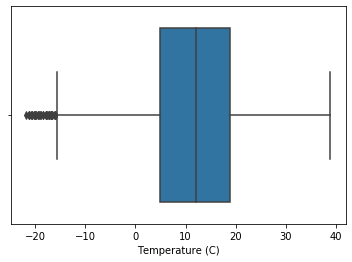

In [57]:
import seaborn as sns


sns.boxplot(x=df['Temperature (C)'])

In [58]:
Q1 = df['Temperature (C)'].quantile(0.25)
Q3 = df['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Temperature (C)'] >= Q1 - 1.5 * IQR) & (df['Temperature (C)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

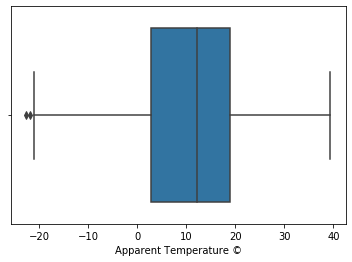

In [59]:
sns.boxplot(x=df['Apparent Temperature ©'])

In [60]:
Q1 = df['Apparent Temperature ©'].quantile(0.25)
Q3 = df['Apparent Temperature ©'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Apparent Temperature ©'] >= Q1 - 1.5 * IQR) & (df['Apparent Temperature ©'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

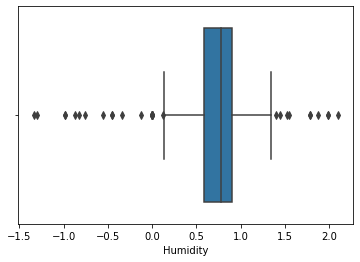

In [61]:
sns.boxplot(x=df['Humidity'])

In [62]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Humidity'] >= Q1 - 1.5 * IQR) & (df['Humidity'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

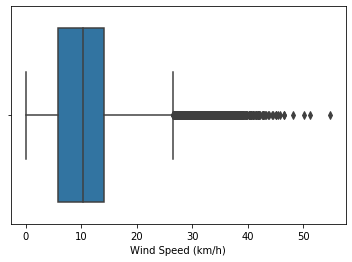

In [63]:
sns.boxplot(x=df['Wind Speed (km/h)'])

In [64]:
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Wind Speed (km/h)'] >= Q1 - 1.5 * IQR) & (df['Wind Speed (km/h)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

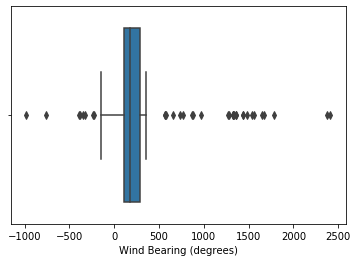

In [65]:
sns.boxplot(x=df['Wind Bearing (degrees)'])

In [66]:
Q1 = df['Wind Bearing (degrees)'].quantile(0.25)
Q3 = df['Wind Bearing (degrees)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Wind Bearing (degrees)'] >= Q1 - 1.5 * IQR) & (df['Wind Bearing (degrees)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

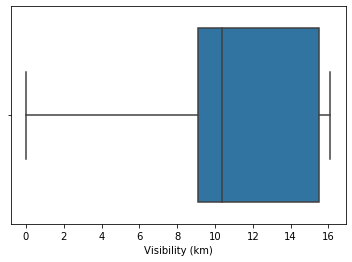

In [67]:
sns.boxplot(x=df['Visibility (km)'])

In [68]:
Q1 = df['Visibility (km)'].quantile(0.25)
Q3 = df['Visibility (km)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Visibility (km)'] >= Q1 - 1.5 * IQR) & (df['Visibility (km)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

In [69]:
df

,Unnamed: 0,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
1,1,2012-04-01 01:00:00.000 +0200,16,0,8.333333,5.194444,0.450000,20.9300,320.0,16.1000,1004.1,Partly cloudy until evening and breezy in the ...
3,3,2012-04-01 03:00:00.000 +0200,16,0,6.111111,1.888889,0.570000,25.7600,310.0,16.1000,1005.9,Partly cloudy until evening and breezy in the ...
6,6,2012-04-01 06:00:00.000 +0200,16,0,3.888889,-0.805556,0.731044,24.1500,330.0,9.9820,1008.3,Partly cloudy until evening and breezy in the ...
7,7,2012-04-01 07:00:00.000 +0200,16,0,2.777778,-2.038889,0.520000,22.5400,320.0,9.9820,1010.3,Partly cloudy until evening and breezy in the ...
11,11,2012-04-01 11:00:00.000 +0200,18,0,7.711111,3.900000,0.380000,26.3235,329.0,10.3684,1012.74,Partly cloudy until evening and breezy in the ...
...,...,...,...,...,...,...,...,...,...,...,...,...
35072,35072,2015-09-09 19:00:00.000 +0200,18,0,16.011111,16.011111,0.460000,0.1288,340.0,16.1000,1019.23,Partly cloudy starting in the morning continui...
35073,35073,2015-09-09 20:00:00.000 +0200,18,0,13.061111,13.061111,0.550000,6.9552,331.0,15.5526,1019.81,Partly cloudy starting in the morning continui...
35074,35074,2015-09-09 21:00:00.000 +0200,18,0,11.161111,11.161111,0.670000,7.9212,352.0,16.1000,1020.33,Partly cloudy starting in the morning continui...
35075,35075,2015-09-09 22:00:00.000 +0200,6,0,10.583333,10.583333,0.690000,6.4239,342.0,16.1000,1019.75,Partly cloudy starting in the morning continui...


## Normalization and Standardization

In [70]:
# Calculating mean of all required columns
df[['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].mean()

Temperature (C)            12.343751
Apparent Temperature ©     11.363360
Humidity                    0.733975
Wind Speed (km/h)          10.153091
Wind Bearing (degrees)    183.584164
Visibility (km)            10.880969
dtype: float64

In [71]:
# Calculating variance of all required columns
df[['Temperature (C)','Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].var()

Temperature (C)              90.842669
Apparent Temperature ©      111.891562
Humidity                      0.040169
Wind Speed (km/h)            34.458552
Wind Bearing (degrees)    11607.907195
Visibility (km)              20.251925
dtype: float64

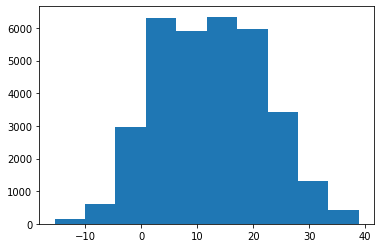

In [72]:
pyplot.hist(df['Temperature (C)'])
pyplot.show()

In [73]:
cols = ['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

# Create x, where x is the values of cols as floats
x = df[cols].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df = pd.DataFrame(x_scaled)
df.columns = ['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df

,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.438426,0.435537,0.258333,0.787879,0.922311,1.000,0.963276
1,0.397547,0.380900,0.358333,0.969697,0.902390,1.000,0.965003
2,0.356668,0.336364,0.492537,0.909091,0.942231,0.620,0.967306
3,0.336229,0.315978,0.316667,0.848485,0.922311,0.620,0.969224
4,0.426980,0.414141,0.200000,0.990909,0.940239,0.644,0.971565
...,...,...,...,...,...,...,...
33401,0.579663,0.614325,0.266667,0.004848,0.962151,1.000,0.977791
33402,0.525396,0.565565,0.341667,0.261818,0.944223,0.966,0.978348
33403,0.490445,0.534160,0.441667,0.298182,0.986056,1.000,0.978846
33404,0.479816,0.524610,0.458333,0.241818,0.966135,1.000,0.978290


## Need for Normalization and it's effects on the Dataset

    -> In the context of machine learning and data science, normalization takes the values from the database and where they are numeric columns, changes them into a common scale. 
    -> The main benefits of normalization in analytical terms are that it allows faster searching and sorting as it is better at creating indexes via smaller, logical tables. 
    -> Also, in having more tables, there is a better use of segments to control the tangible placement of data. There will be fewer nulls and redundant data after modelling any necessary columns and bias/issues with anomalies are greatly reduced by removing the differences in scale. 
    -> In summary, data normalization processes ensure that our data is structured logically and scaled proportionally where required, generally on a scale of 0 to 1. It tends to be used where you have predefined assumptions of your model. 
    -> By ensuring you have normalized data, the likelihood of success in your machine learning and data science projects vastly improves. 
    -> It is vital that organizations invest as much in ensuring the quality of their data as they do in the analytical and scientific models that are created by it. Preparation is everything in a successful data strategy.

(array([ 156.,  615., 2970., 6314., 5904., 6343., 5958., 3410., 1323.,
         413.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

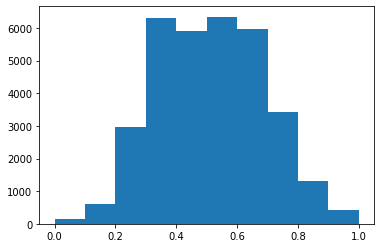

In [74]:
pyplot.hist(df['Temperature (C)'])

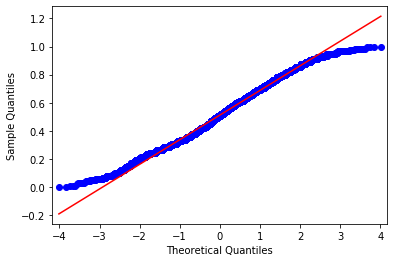

In [75]:
qqplot(df['Temperature (C)'], line = 's')
pyplot.show()

## Testing of Hypothesis:

### 1. For Column Temperature (C)

In [76]:
# Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Temperature (C)"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Temparature is 12 degree C (mu=12)
H0="The mean Temparature is 12 degree C (mu=12)"

#Alternate Hypothesis
# H1: The mean Temparature is not equal to 12 degree C (mu != 12)
H1="The mean Temparature is not equal to 12 degree C (mu != 12)"

population_mean_from_hypothesis=12

#determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)

print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Temparature is 12 degree C (mu=12)
z_score=-11975.4679781561
p_value=1.0000000000
sample_mean=0.5121998163
sample_sd=0.1753301553
The test is 2 tailed test


### 2. For Column Temperature (C)

In [77]:
# Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Temperature (C)"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Temparature is greater than or equal to 14 degree C (mu >= 14)
H0="The mean Temparature is greater than or equal to 14 degree C (mu>=14)"

#Alternate Hypothesis
# H1: The mean Temparature is less than 14 degree C (mu < 14)
H1="The mean Temparature is less than 14 degree C (mu < 14)"

population_mean_from_hypothesis=14

#determining if the test is one tailed or two tailed and alloting alpha value

test="one_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)

print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Temparature is greater than or equal to 14 degree C (mu>=14)
z_score=-14060.3698369319
p_value=1.0000000000
sample_mean=0.5121998163
sample_sd=0.1753301553
The test is 1 tailed test


### 3. For Apparent Temperature ©

In [78]:
#Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Apparent Temperature ©"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Apparent Temperature © is 11.5 degree © (mu=11.5)
H0="The mean Apparent Temperature © is 11.5 degree © (mu=11.5)"

#Alternate Hypothesis
# H1: The mean Apparent Temperature © is not equal to 11.5 degree © (mu != 11.5)
H1="The mean Apparent Temperature © is not equal to 11.5 degree © (mu != 11.5)"

population_mean_from_hypothesis=11.5

#determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)
    
print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Apparent Temperature © is 11.5 degree © (mu=11.5)
z_score=-11459.8370316938
p_value=1.0000000000
sample_mean=0.5375027416
sample_sd=0.1748410051
The test is 2 tailed test


### 4. For Humidity

In [79]:
#Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Humidity"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Humidity is equal to 0.8  (mu=11.5)
H0="The mean Humidity is equal to 0.8  (mu=11.5)"

#Alternate Hypothesis
# H1: The mean Humidity is not equal to 0.8  (mu=11.5)
H1="The mean Humidity is not equal to 0.8  (mu=11.5)"

population_mean_from_hypothesis=0.8

#determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)
    
print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Humidity is equal to 0.8  (mu=11.5)
z_score=-333.7946682029
p_value=1.0000000000
sample_mean=0.4949793762
sample_sd=0.1670175267
The test is 2 tailed test


# Correlation Test - Pearson Correlation


### 1.Correlation test on Temperature (C) and Apparent Temperature ©

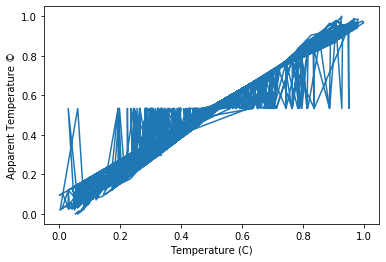

stat=0.99058, p=0.000000
dependent samples
Temperature (C) and Wind Bearing (degrees) are positively correlated.


In [33]:
FirstSample = df['Temperature (C)']
SecondSample = df['Apparent Temperature ©']

plt.plot(FirstSample,SecondSample)
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature ©')
plt.show()

#pearson correlation
from scipy.stats import pearsonr
correlation_const, p_value = pearsonr(FirstSample, SecondSample)

# Conclusions on the data if they are dependent or independent using p-value
print('correlation_const=%.5f, p_value=%5f' % (correlation_const,p_value))
if p_value > 0.05:
    print('independent samples')
else:
    print('dependent samples')
    
# Conclusions on correlation constant
if(correlation_const>0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are positively correlated.")
elif(correlation_const<-0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are negatively correlated.")
else:
    print("Temperature (C) and Wind Bearing (degrees) are not correlated.")

### 2.Correlation test on Temperature (C) and Humidity

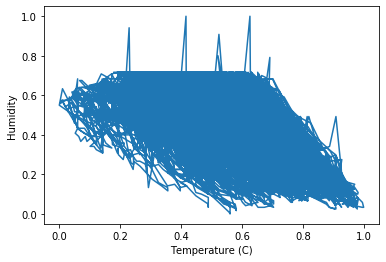

stat=-0.63384, p=0.000000
dependent samples
Temperature (C) and Wind Bearing (degrees) are negatively correlated.


In [82]:
FirstSample = df['Temperature (C)']
SecondSample = df['Humidity']

plt.plot(FirstSample,SecondSample)
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.show()

#pearson correlation
from scipy.stats import pearsonr
correlation_const, p_value = pearsonr(FirstSample, SecondSample)

# Conclusions on the data if they are dependent or independent using p-value
print('correlation_const=%.5f, p_value=%5f' % (correlation_const,p_value))
if p_value > 0.05:
    print('independent samples')
else:
    print('dependent samples')
    
# Conclusions on correlation constant
if(correlation_const>0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are positively correlated.")
elif(correlation_const<-0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are negatively correlated.")
else:
    print("Temperature (C) and Wind Bearing (degrees) are not correlated.")

### 3.Correlation test on Temperature (C) and Wind Speed (km/h)

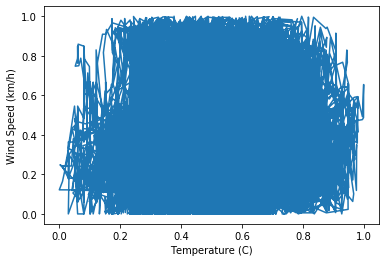

stat=0.02733, p=0.000001
dependent samples
Temperature (C) and Wind Bearing (degrees) are not correlated.


In [83]:
FirstSample = df['Temperature (C)']
SecondSample = df['Wind Speed (km/h)']

plt.plot(FirstSample,SecondSample)
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

#pearson correlation
from scipy.stats import pearsonr
correlation_const, p_value = pearsonr(FirstSample, SecondSample)

# Conclusions on the data if they are dependent or independent using p-value
print('correlation_const=%.5f, p_value=%5f' % (correlation_const,p_value))
if p_value > 0.05:
    print('independent samples')
else:
    print('dependent samples')
    
# Conclusions on correlation constant
if(correlation_const>0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are positively correlated.")
elif(correlation_const<-0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are negatively correlated.")
else:
    print("Temperature (C) and Wind Bearing (degrees) are not correlated.")

### 4.Correlation test on Temperature (C) and Wind Bearing (degrees)

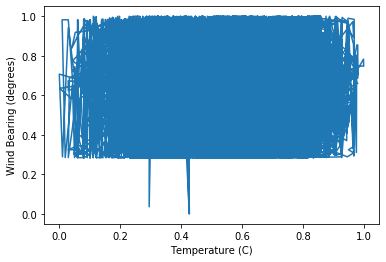

stat=0.03082, p=0.000000
dependent samples
Temperature (C) and Wind Bearing (degrees) are not correlated.


In [84]:
FirstSample = df['Temperature (C)']
SecondSample = df['Wind Bearing (degrees)']

plt.plot(FirstSample,SecondSample)
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Bearing (degrees)')
plt.show()

#pearson correlation
from scipy.stats import pearsonr
correlation_const, p_value = pearsonr(FirstSample, SecondSample)

# Conclusions on the data if they are dependent or independent using p-value
print('correlation_const=%.5f, p_value=%5f' % (correlation_const,p_value))
if p_value > 0.05:
    print('independent samples')
else:
    print('dependent samples')
    
# Conclusions on correlation constant
if(correlation_const>0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are positively correlated.")
elif(correlation_const<-0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are negatively correlated.")
else:
    print("Temperature (C) and Wind Bearing (degrees) are not correlated.")

### 5.Correlation test on Temperature (C) and Visibility (km)	

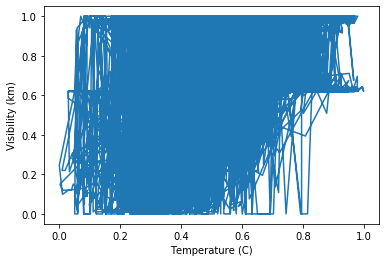

correlation_const=0.40038, p=0.000000
dependent samples
Temperature (C) and Wind Bearing (degrees) are not correlated.


In [85]:
FirstSample = df['Temperature (C)']
SecondSample = df['Visibility (km)']

plt.plot(FirstSample,SecondSample)
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')
plt.show()

#pearson correlation
from scipy.stats import pearsonr
correlation_const, p_value = pearsonr(FirstSample, SecondSample)

# Conclusions on the data if they are dependent or independent using p-value
print('correlation_const=%.5f, p_value=%5f' % (correlation_const,p_value))
if p_value > 0.05:
    print('independent samples')
else:
    print('dependent samples')
    
# Conclusions on correlation constant
if(correlation_const>0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are positively correlated.")
elif(correlation_const<-0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are negatively correlated.")
else:
    print("Temperature (C) and Wind Bearing (degrees) are not correlated.")

### 5.Correlation test on Temperature (C) and Pressure (millibars)

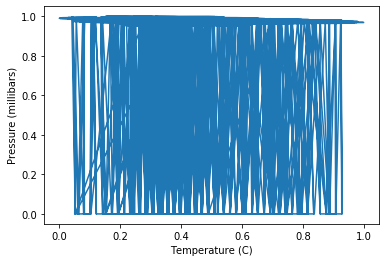

ValueError: array must not contain infs or NaNs

In [88]:
FirstSample = df['Temperature (C)']
SecondSample = df['Pressure (millibars)']

plt.plot(FirstSample,SecondSample)
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (millibars)')
plt.show()

#pearson correlation
from scipy.stats import pearsonr
correlation_const, p_value = pearsonr(FirstSample, SecondSample)

# Conclusions on the data if they are dependent or independent using p-value
print('correlation_const=%.5f, p_value=%5f' % (correlation_const,p_value))
if p_value > 0.05:
    print('independent samples')
else:
    print('dependent samples')
    
# Conclusions on correlation constant
if(correlation_const>0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are positively correlated.")
elif(correlation_const<-0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are negatively correlated.")
else:
    print("Temperature (C) and Wind Bearing (degrees) are not correlated.")

### 5.Correlation test on Humidity and Wind Speed (km/h)

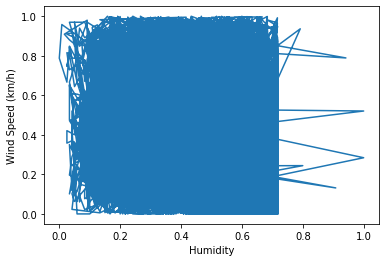

stat=-0.22020, p=0.000000
dependent samples
Temperature (C) and Wind Bearing (degrees) are not correlated.


In [89]:
FirstSample = df['Humidity']
SecondSample = df['Wind Speed (km/h)']

plt.plot(FirstSample,SecondSample)
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')
plt.show()

#pearson correlation
from scipy.stats import pearsonr
correlation_const, p_value = pearsonr(FirstSample, SecondSample)

# Conclusions on the data if they are dependent or independent using p-value
print('correlation_const=%.5f, p_value=%5f' % (correlation_const,p_value))
if p_value > 0.05:
    print('independent samples')
else:
    print('dependent samples')
    
# Conclusions on correlation constant
if(correlation_const>0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are positively correlated.")
elif(correlation_const<-0.6 and p_value < 0.05):
    print("Temperature (C) and Wind Bearing (degrees) are negatively correlated.")
else:
    print("Temperature (C) and Wind Bearing (degrees) are not correlated.")

## Feature Selection:

In [127]:
# Selecting the features that will help in prediction

features = ['Summary','Precip Type','Apparent Temperature ©','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
X = df[features] 
y = df["Temperature (C)"]

## Linear Regression:

In [128]:
# split data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [129]:
# Fitting simple linear regression to training set 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [130]:
# Predicting the test set results

y_pred = regressor.predict(X_test)

In [131]:
# Finding the error in the prediction , lower the error better the accuracy

from sklearn.metrics import mean_squared_error
score = math.sqrt(mean_squared_error(y_test, y_pred))

score

1.1109033477732861